In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

import datasets
import utils

In [2]:
dataset = datasets.Tumors()

In [3]:
tumor_masses = []
mal_masses = []
ben_masses = []
for x,m,y in dataset:
    d_middle = m.shape[2]//2
    s = m[:,:,d_middle-1:d_middle+2].sum()/3
    tumor_masses.append((s, y))
    if y == 0:
        mal_masses.append(s)
    else:
        ben_masses.append(s)

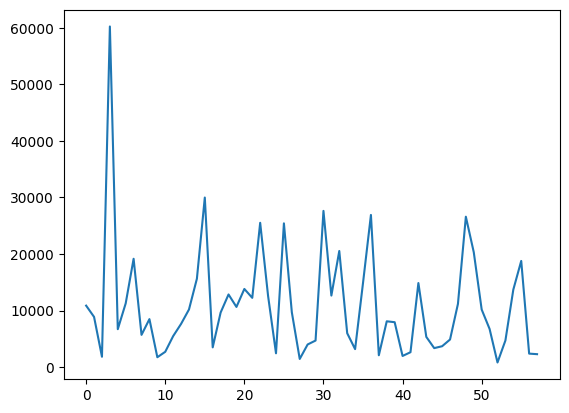

In [4]:
plt.plot(mal_masses)

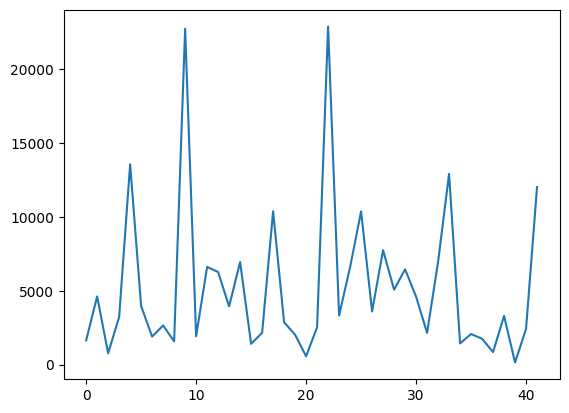

In [5]:
plt.plot(ben_masses)

In [6]:
X, Y = list(zip(*tumor_masses))
X = [[x] for x in X]
print(X, Y)

[[10882.0], [8892.0], [1847.3333333333333], [60223.0], [6721.333333333333], [11281.0], [19163.333333333332], [5716.666666666667], [8498.333333333334], [1763.6666666666667], [2722.6666666666665], [5497.333333333333], [7653.333333333333], [10203.666666666666], [15640.0], [29989.0], [3508.3333333333335], [9661.0], [12858.0], [10652.666666666666], [13830.666666666666], [12260.333333333334], [25524.0], [12589.666666666666], [2457.3333333333335], [25427.333333333332], [9717.333333333334], [1457.6666666666667], [4017.3333333333335], [4710.333333333333], [27630.0], [12662.333333333334], [20540.666666666668], [6010.333333333333], [3196.3333333333335], [14894.333333333334], [26912.333333333332], [2111.0], [8113.0], [7954.333333333333], [1986.0], [2648.3333333333335], [14874.333333333334], [5358.666666666667], [3372.3333333333335], [3707.3333333333335], [4893.0], [11191.333333333334], [26600.0], [20322.666666666668], [10192.0], [6762.666666666667], [835.3333333333334], [4720.666666666667], [13715

In [7]:
acc = 0 
cfm = np.zeros([2,2], dtype=np.uint8)

for i in range(len(X)):

    x_test = X[i]
    y_test = Y[i]
    x_train = X[:i]+X[i+1:]
    y_train = Y[:i]+Y[i+1:]
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_train)
    accuracy = accuracy_score(y_train, prediction)
    print(accuracy)
    predict = clf.predict([x_test])[0]
    if predict == y_test:
        acc += 1
    cfm[y_test,predict] += 1

print(f"test accuracy is: {acc/100}")
print(cfm)

0.6666666666666666
0.6666666666666666
0.6767676767676768
0.6565656565656566
0.6565656565656566
0.6666666666666666
0.6666666666666666
0.6565656565656566
0.6666666666666666
0.6767676767676768
0.6767676767676768
0.6565656565656566
0.6565656565656566
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6767676767676768
0.6666666666666666
0.6666666666666666
0.6767676767676768
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6565656565656566
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6767676767676768
0.6666666666666666
0.6565656565656566
0.6767676767676768
0.6767676767676768
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6565656565656566
0.6767676767